## Imports 

In [14]:
import os
import urllib.request

import numpy as np
import matplotlib.pyplot as plt
import astropy.io as aio
import astropy.units as u

import lenstools as lt

%matplotlib inline

# One map sample 

## Header 

In [2]:
with aio.fits.open("hlsp_frontier_model_abell2744_cats_v4.1_kappa.fits") as hdu:
    head = hdu[0].header

head

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2000 / length of data axis 1                          
NAXIS2  =                 2000 / length of data axis 2                          
EXTEND  =                    F / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                   0. / BZERO                                          
BSCALE  =                   1. / BSCALE                                         
EQUINOX =               2000.0 / EQUINOX                                        
CTYPE1  = 'RA---TAN'           / CTYPE1                                         
CRVAL1  =             3.5862

## Read one kappa map 

In [3]:
def loadConvergenceMap(fname):
    with aio.fits.open(fname) as hdu:
        angle = 0.3*hdu[0].header["NAXIS1"]*u.arcsec
        kappa = hdu[0].data
    return angle,kappa

In [4]:
conv = lt.image.convergence.ConvergenceMap.load("hlsp_frontier_model_abell2744_cats_v4.1_kappa.fits",format=loadConvergenceMap)

In [5]:
conv.info

Pixels on a side: 2000
Pixel size: 0.3 arcsec
Total angular size: 600.0 arcsec
lmin=2.2e+03 ; lmax=3.1e+06


## Visualize log(kappa) 

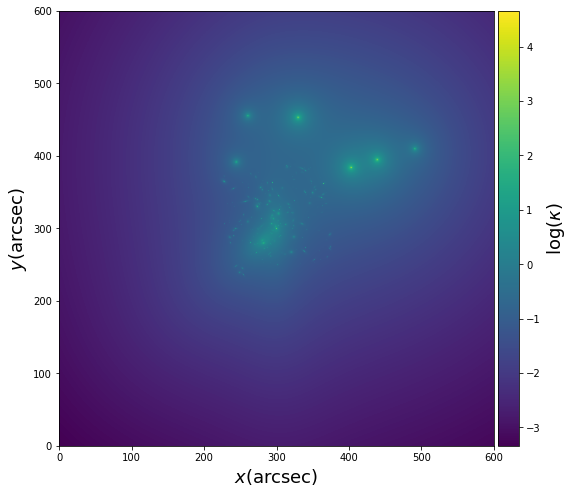

In [6]:
fig,ax = plt.subplots(figsize=(12,8))
lt.image.convergence.ConvergenceMap(np.log(conv.data),angle=conv.side_angle).visualize(colorbar=True,cbar_label=r"$\log(\kappa)$",fig=fig,ax=ax)

## 2D angular power spectrum 

In [19]:
ell_bins = np.logspace(4.5,5.5,50)
ell,Pell = conv.powerSpectrum(ell_bins)

Text(0,0.5,'$\\ell(\\ell+1)P_\\ell/2\\pi$')

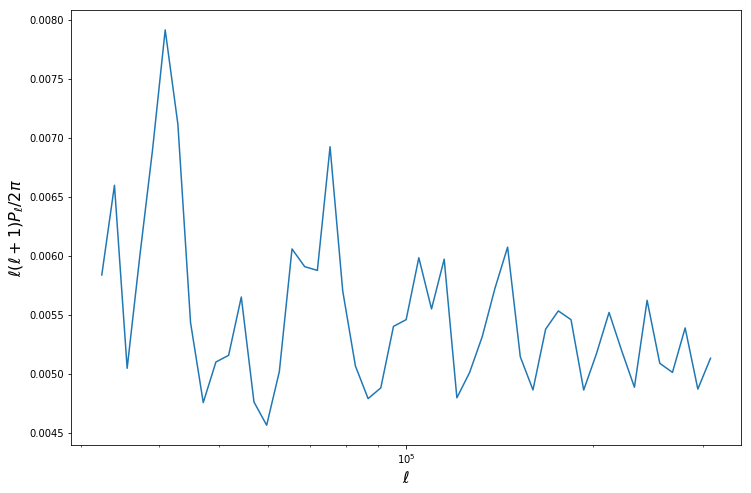

In [20]:
fig,ax = plt.subplots(figsize=(12,8))

ax.plot(ell,ell*(ell+1)*Pell/(2*np.pi))
ax.set_xscale("log")

ax.set_xlabel(r"$\ell$",fontsize=16)
ax.set_ylabel(r"$\ell(\ell+1)P_\ell/2\pi$",fontsize=16)

# Ensemble of kappa maps

## Download kappa maps

In [15]:
def downloadMaps(ns,dest):
    url_root = "https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/"
    map_name = "hlsp_frontier_model_abell2744_cats-map{0:03d}_v4.1_kappa.fits"
    for n in ns:
        url = url_root + map_name.format(n)
        print("[+] Downloading: "+url)
        urllib.request.urlretrieve(url,os.path.join(dest,map_name.format(n)))

In [34]:
downloadMaps(range(200),"hlsp_maps/range")

[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map000_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map001_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map002_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map003_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map004_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map005_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/

[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map054_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map055_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map056_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map057_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map058_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map059_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/

[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map108_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map109_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map110_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map111_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map112_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map113_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/

[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map162_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map163_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map164_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map165_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map166_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/range/hlsp_frontier_model_abell2744_cats-map167_v4.1_kappa.fits
[+] Downloading: https://archive.stsci.edu/pub/hlsp/frontier/abell2744/models/cats/v4.1/

## Kappa power spectrum measurements 

In [25]:
def measureKappaPowerSpectrum(ell_bins,ns,map_root="hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map{0:03d}_v4.1_kappa.fits"):
    ps = np.zeros((len(ns),len(ell_bins)-1))
    for i,n in enumerate(ns):
        map_fname = map_root.format(n)
        print("[+] Measuring kappa power spectrum in map: "+map_fname)
        conv = lt.image.convergence.ConvergenceMap.load(map_fname,format=loadConvergenceMap)
        ell,pn = conv.powerSpectrum(ell_bins)
        ps[i,:] = pn
    
    return ell,ps

In [35]:
ell,kappa_ps = measureKappaPowerSpectrum(ell_bins,range(200))

[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map000_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map001_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map002_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map003_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map004_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map005_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map006_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map007_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_

[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map071_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map072_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map073_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map074_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map075_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map076_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map077_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map078_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_

[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map142_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map143_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map144_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map145_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map146_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map147_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map148_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_frontier_model_abell2744_cats-map149_v4.1_kappa.fits
[+] Measuring kappa power spectrum in map: hlsp_maps/range/hlsp_

Text(0,0.5,'$\\ell(\\ell+1)P_\\ell/2\\pi$')

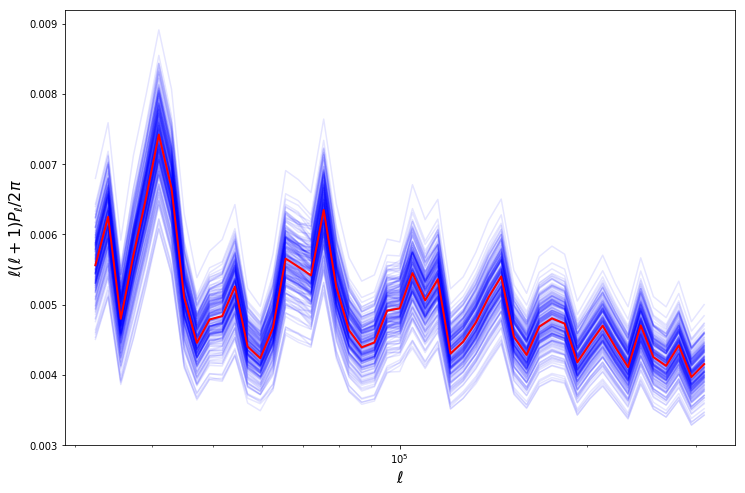

In [43]:
fig,ax = plt.subplots(figsize=(12,8))

for ps in kappa_ps:
    ax.plot(ell,ell*(ell+1)*ps/(2*np.pi),color="blue",alpha=0.1)
ax.plot(ell,ell*(ell+1)*kappa_ps.mean(0)/(2*np.pi),color="red",linewidth=2)

ax.set_xscale("log")

ax.set_xlabel(r"$\ell$",fontsize=16)
ax.set_ylabel(r"$\ell(\ell+1)P_\ell/2\pi$",fontsize=16)